In [1]:
import pandas as pd
df = pd.read_csv('GENERAL.csv')
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


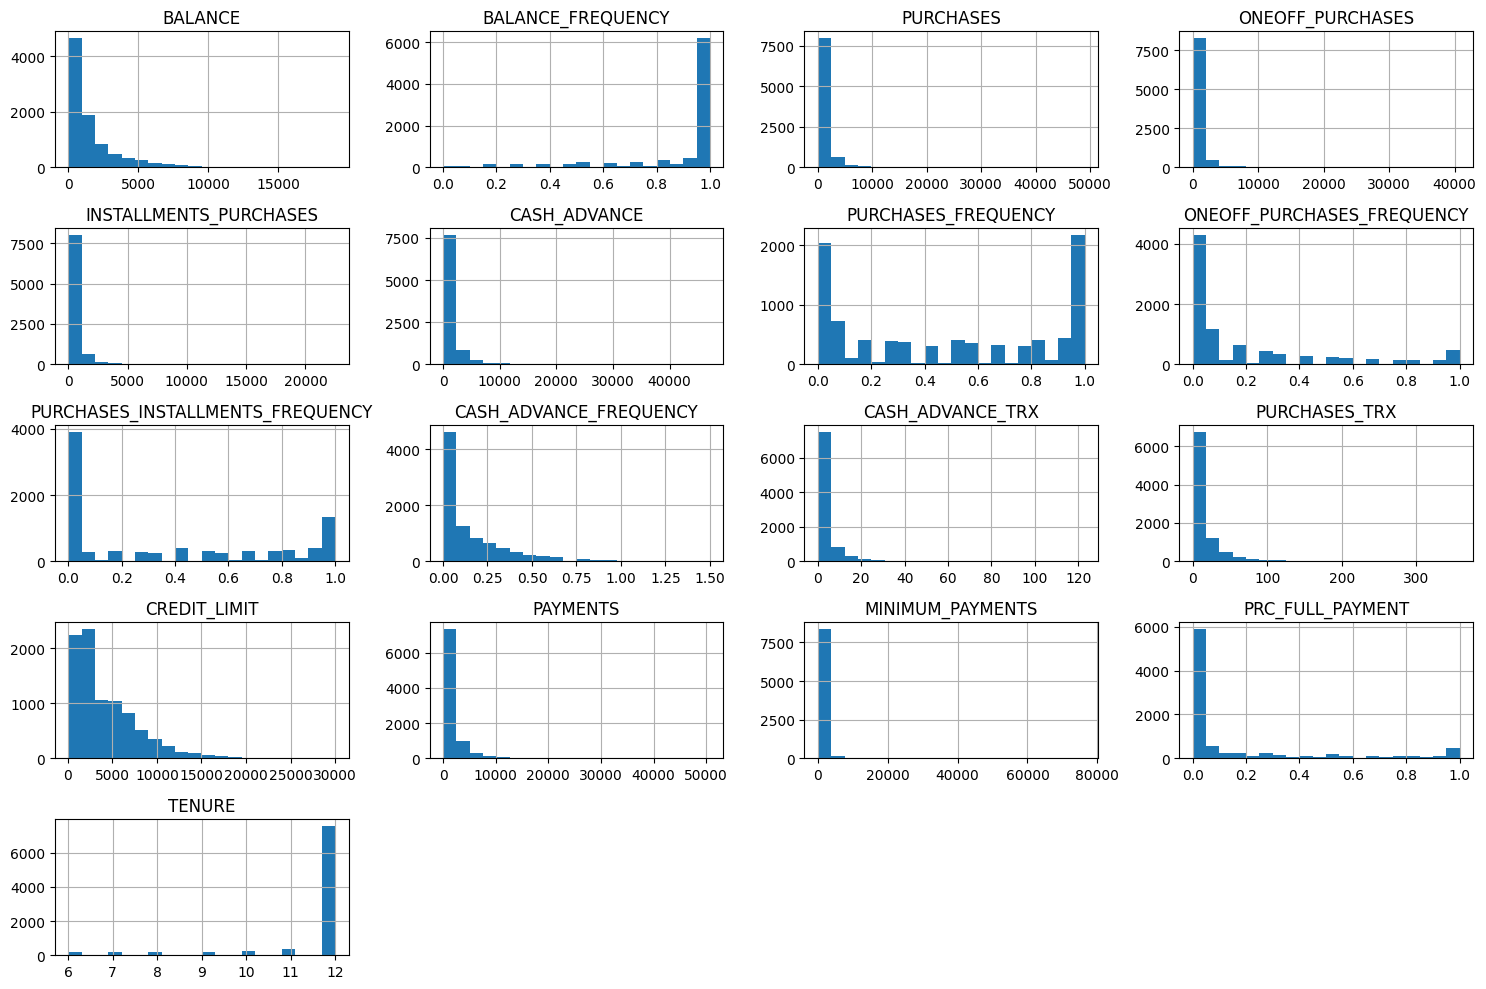

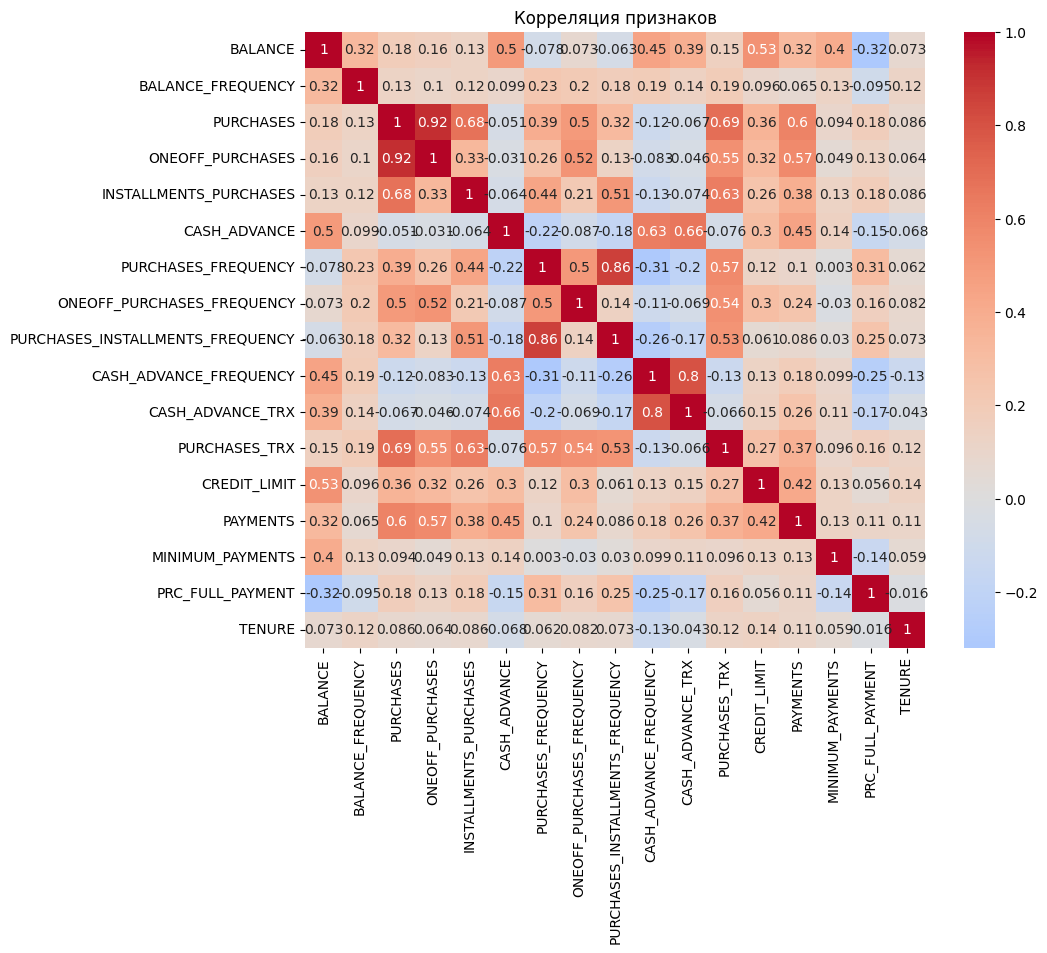

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df['CUST_ID'] = df['CUST_ID'].astype('category')
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Корреляция
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop(columns=['CUST_ID']).corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Корреляция признаков')
plt.show()


In [3]:
# Удаление дубликатов
df_clean = df.drop_duplicates()

# Обработка пропусков
for col in df_clean.columns:
    if df_clean[col].dtype in ['object', 'category']:
        df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0] if not df_clean[col].mode().empty else 'Unknown')
    else:
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())

df_clean.info()
df_clean.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   CUST_ID                           8950 non-null   category
 1   BALANCE                           8950 non-null   float64 
 2   BALANCE_FREQUENCY                 8950 non-null   float64 
 3   PURCHASES                         8950 non-null   float64 
 4   ONEOFF_PURCHASES                  8950 non-null   float64 
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64 
 6   CASH_ADVANCE                      8950 non-null   float64 
 7   PURCHASES_FREQUENCY               8950 non-null   float64 
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64 
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64 
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64 
 11  CASH_ADVANCE_TRX                  8950 non-null   int64 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.

Точность логистической регрессии на предсказании кластеров: 0.959

Отчёт по классификации:
              precision    recall  f1-score   support

           0       1.00      0.30      0.46        10
           1       0.96      0.94      0.95       509
           2       0.92      0.93      0.93       320
           3       0.00      0.00      0.00         1
           4       0.96      1.00      0.98       277
           5       0.98      0.99      0.98       655
           6       0.86      0.67      0.75        18

    accuracy                           0.96      1790
   macro avg       0.81      0.69      0.72      1790
weighted avg       0.96      0.96      0.96      1790


Средние значения признаков по кластерам (KMeans):
         BALANCE_FREQUENCY  ONEOFF_PURCHASES  PURCHASES_FREQUENCY  \
Cluster                                                             
0                 0.973840      16190.527755             0.882313   
1                 0.963981        216.499646          

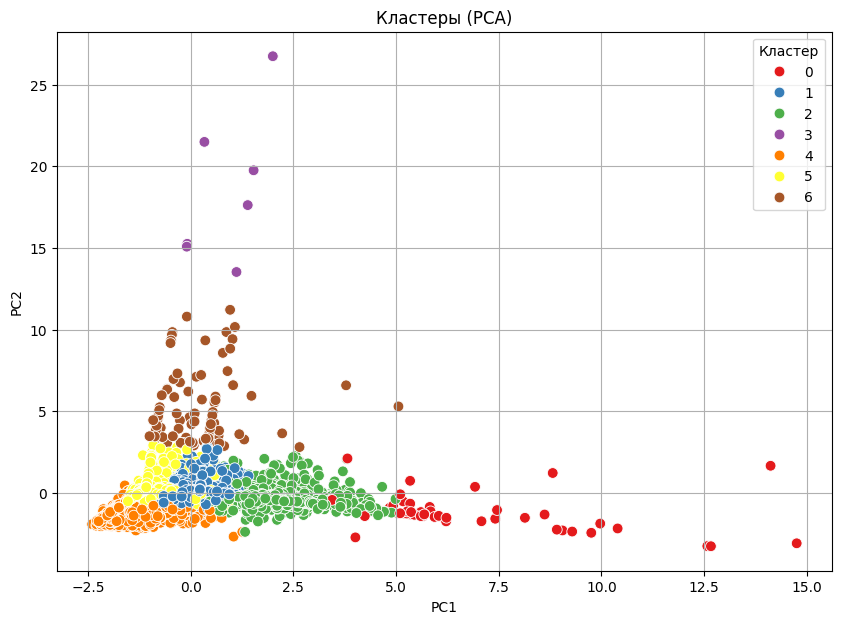

In [4]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

features = ['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'PURCHASES_FREQUENCY',
            'ONEOFF_PURCHASES_FREQUENCY', 'MINIMUM_PAYMENTS']

X = df_clean[features].copy()

# 4. Обработка пропусков
X = X.fillna(X.median())

# 5. Масштабирование
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Кластеризация (KMeans)
k_opt = 7  # можно определить через метод локтя
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Добавим метки кластеров в данные
df['Cluster'] = cluster_labels

# 7. Разделение на train/test (для Logistic Regression)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, cluster_labels, test_size=0.2, random_state=42, stratify=cluster_labels
)

# 8. Обучение Logistic Regression
logreg = LogisticRegression(multi_class='ovr', solver='liblinear', max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# 9. Оценка
y_pred = logreg.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Точность логистической регрессии на предсказании кластеров: {acc:.3f}")
print("\nОтчёт по классификации:")
print(classification_report(y_test, y_pred))

# 10. Сравнение: средние значения признаков по кластерам
print("\nСредние значения признаков по кластерам (KMeans):")
print(df.groupby('Cluster')[features].mean())

# 11. (Опционально) Визуализация кластеров через PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='Set1', s=60)
plt.title('Кластеры (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Кластер')
plt.grid(True)
plt.show()

In [6]:
import pandas as pd
import numpy as np

# === 1. ЗАГРУЗКА ДАННЫХ ===
file_path = 'GENERAL.csv'
df = pd.read_csv(file_path, header=None, low_memory=False)

# Присвоим имена столбцам
df.columns = [f'C{i}' for i in range(df.shape[1])]

print("=== 1. Оценка полноты данных (Completeness) ===")

# Процент заполненности по каждому столбцу
completeness_pct = df.notnull().mean() * 100
print("\nПроцент заполненности по столбцам:")
print(completeness_pct.round(2))

# Критичные пропуски (<90% заполнения)
critical_threshold = 90
critical_missing = completeness_pct[completeness_pct < critical_threshold]
if not critical_missing.empty:
    print(f"\n⚠️ Критичные пропуски (<{critical_threshold}% заполнения):")
    print(critical_missing.round(2))
else:
    print(f"\n✅ Нет критичных пропусков (все ≥{critical_threshold}%).")

# Заполнение числовых пропусков средним
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
print("\n✅ Пропуски в числовых столбцах заполнены средним значением.")

# === 2. ОЦЕНКА ВАЛИДНОСТИ (Validity) ===
print("\n=== 2. Оценка валидности (Validity) ===")

# Попытка приведения всех столбцов к числовому типу и подсчёт невалидных
invalid_counts = {}
total_rows = len(df)

for col in df.columns:
    # Сохраняем исходный столбец
    original = df[col].copy()
    # Пробуем привести к числу, невалидные → NaN
    numeric_series = pd.to_numeric(df[col], errors='coerce')
    invalid_count = numeric_series.isna().sum()
    invalid_pct = (invalid_count / total_rows) * 100
    invalid_counts[col] = invalid_pct
    # Обновляем столбец (невалидные станут NaN, но мы их не заполняем здесь)
    df[col] = numeric_series

# Выводим процент невалидных значений
invalid_df = pd.Series(invalid_counts).round(2)
if invalid_df.max() > 0:
    print("\nПроцент невалидных (нечисловых) значений по столбцам:")
    print(invalid_df[invalid_df > 0])
else:
    print("\n✅ Все значения могут быть интерпретированы как числовые.")

# Выбросы: IQR-метод только для числовых столбцов (где есть данные)
print("\nПоиск выбросов (метод IQR) в числовых столбцах:")
outliers_summary = {}
for col in numeric_cols:
    data = df[col].dropna()
    if len(data) < 5:  # пропускаем, если мало данных
        continue
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_count = ((data < lower_bound) | (data > upper_bound)).sum()
    if outlier_count > 0:
        outliers_summary[col] = (outlier_count / len(data)) * 100

if outliers_summary:
    print("Столбцы с выбросами (% от количества значений):")
    for col, pct in outliers_summary.items():
        print(f"  {col}: {pct:.2f}%")
else:
    print("✅ Выбросов не обнаружено.")

# === 3. ОЦЕНКА СОГЛАСОВАННОСТИ (Consistency) ===
print("\n=== 3. Оценка согласованности (Consistency) ===")

# Дубликаты
duplicates = df.duplicated().sum()
duplicates_pct = (duplicates / len(df)) * 100 if len(df) > 0 else 0
if duplicates > 0:
    print(f"⚠️ Найдено {duplicates} дублирующих строк ({duplicates_pct:.2f}%).")
else:
    print("✅ Дубликатов строк не обнаружено.")

# Противоречия: отрицательные значения в, предположительно, неотрицательных полях
# (например: суммы, счётчики, доходы и т.п.)
non_negative_violations = {}
for col in numeric_cols:
    neg_count = (df[col] < 0).sum()
    if neg_count > 0:
        non_negative_violations[col] = (neg_count / len(df)) * 100

if non_negative_violations:
    print("\n⚠️ Обнаружены отрицательные значения в, предположительно, неотрицательных столбцах (%):")
    for col, pct in non_negative_violations.items():
        print(f"  {col}: {pct:.2f}%")
else:
    print("\n✅ Отрицательных значений в числовых столбцах не найдено.")

=== 1. Оценка полноты данных (Completeness) ===

Процент заполненности по столбцам:
C0     100.00
C1     100.00
C2     100.00
C3     100.00
C4     100.00
C5     100.00
C6     100.00
C7     100.00
C8     100.00
C9     100.00
C10    100.00
C11    100.00
C12    100.00
C13     99.99
C14    100.00
C15     96.50
C16    100.00
C17    100.00
dtype: float64

✅ Нет критичных пропусков (все ≥90%).

✅ Пропуски в числовых столбцах заполнены средним значением.

=== 2. Оценка валидности (Validity) ===

Процент невалидных (нечисловых) значений по столбцам:
C0     100.00
C1       0.01
C2       0.01
C3       0.01
C4       0.01
C5       0.01
C6       0.01
C7       0.01
C8       0.01
C9       0.01
C10      0.01
C11      0.01
C12      0.01
C13      0.02
C14      0.01
C15      3.51
C16      0.01
C17      0.01
dtype: float64

Поиск выбросов (метод IQR) в числовых столбцах:
✅ Выбросов не обнаружено.

=== 3. Оценка согласованности (Consistency) ===
✅ Дубликатов строк не обнаружено.

✅ Отрицательных значений в 